# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.style
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
import json

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

27205f192f31060bb9c956c5f78d7b74


### Generate the Cities List by Using the `citipy` Library

In [118]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# The Americas (South and North) (Will end up with other countries though)
lat_range = (-80, 80)
lng_range = (-130, -68)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities 

Number of cities in the list: 387


['las tablas',
 'doctor arroyo',
 'yellowknife',
 'coquimbo',
 'puerto ayora',
 'puerto natales',
 'thompson',
 'adamstown',
 'riohacha',
 'punta arenas',
 'guanajuato',
 'barranca',
 'north bend',
 'lebu',
 'eastham',
 'iqaluit',
 'waverly',
 'key west',
 'brisas de zicatela',
 'pinotepa nacional',
 'pisco',
 'durango',
 'taiohae',
 'jamestown',
 'callao',
 'puerto colombia',
 'terrace',
 'ancud',
 'whitehorse',
 'pimentel',
 'minas de marcona',
 'clarinda',
 'pangoa',
 'tres palos',
 'guerrero negro',
 'tinyahuarco',
 'rio gallegos',
 'la ronge',
 'deschutes river woods',
 'ushuaia',
 'chonchi',
 'carahue',
 'nantucket',
 'chibougamau',
 'san patricio',
 'grand rapids',
 'cauquenes',
 'chimbote',
 'sturgeon bay',
 'nicoya',
 'riobamba',
 'tomatlan',
 'port isabel',
 'puerto santa',
 'san luis de la loma',
 'melfort',
 'copala',
 'kenora',
 'cabot',
 'great falls',
 'camalu',
 'williams lake',
 'topolobampo',
 'rhinelander',
 'saucillo',
 'paulden',
 'donaldsonville',
 'hinton',
 'puy

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [2]:
#testing some code rq
units = "Imperial"
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
city = "Winston-Salem"
city_url += city
weather = requests.get(city_url)
json = weather.json()
json

{'coord': {'lon': -80.2442, 'lat': 36.0999},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 77.32,
  'feels_like': 78.57,
  'temp_min': 73.54,
  'temp_max': 80.19,
  'pressure': 1016,
  'humidity': 81,
  'sea_level': 1016,
  'grnd_level': 985},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 130},
 'clouds': {'all': 75},
 'dt': 1722284356,
 'sys': {'type': 1,
  'id': 4531,
  'country': 'US',
  'sunrise': 1722248763,
  'sunset': 1722299317},
 'timezone': -14400,
 'id': 4499612,
 'name': 'Winston-Salem',
 'cod': 200}

In [120]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'
queryURL = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = f"{queryURL}{city}"# YOUR CODE HERE
        response = requests.get(city_weather).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat'] 
        city_lng = response['coord']['lon'] 
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | las tablas
Processing Record 2 of Set 1 | doctor arroyo
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | riohacha
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | guanajuato
Processing Record 12 of Set 1 | barranca
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | eastham
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | waverly
Processing Record 18 of Set 1 | key west
Processing Record 19 of Set 1 | brisas de zicatela
Processing Record 20 of Set 1 | pinotepa nacional
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | durango
Processing

In [121]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)

# Show Record Count
city_data_df.count()

City          382
Lat           382
Lng           382
Max Temp      382
Humidity      382
Cloudiness    382
Wind Speed    382
Country       382
Date          382
dtype: int64

In [122]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,las tablas,7.7667,-80.2833,86.18,99,93,5.73,PA,1722014514
1,doctor arroyo,23.6667,-100.1833,66.56,73,99,1.41,MX,1722014515
2,yellowknife,62.4560,-114.3525,74.41,46,40,13.80,CA,1722014483
3,coquimbo,-29.9533,-71.3436,58.73,77,0,13.80,CL,1722014515
4,puerto ayora,-0.7393,-90.3518,76.96,96,44,8.01,EC,1722014516
...,...,...,...,...,...,...,...,...,...
377,new martinsville,39.6445,-80.8576,80.92,52,77,1.99,US,1722014632
378,yallahs,17.8748,-76.5624,92.93,65,10,14.56,JM,1722014633
379,sonoita,31.8500,-112.8333,94.05,33,50,7.65,MX,1722014633
380,choix,26.7092,-108.3219,93.16,39,56,2.66,MX,1722014633


In [123]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [124]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,las tablas,7.7667,-80.2833,86.18,99,93,5.73,PA,1722014514
1,doctor arroyo,23.6667,-100.1833,66.56,73,99,1.41,MX,1722014515
2,yellowknife,62.4560,-114.3525,74.41,46,40,13.80,CA,1722014483
3,coquimbo,-29.9533,-71.3436,58.73,77,0,13.80,CL,1722014515
4,puerto ayora,-0.7393,-90.3518,76.96,96,44,8.01,EC,1722014516
...,...,...,...,...,...,...,...,...,...
377,new martinsville,39.6445,-80.8576,80.92,52,77,1.99,US,1722014632
378,yallahs,17.8748,-76.5624,92.93,65,10,14.56,JM,1722014633
379,sonoita,31.8500,-112.8333,94.05,33,50,7.65,MX,1722014633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [125]:
# Convert a random point into a date
import datetime
# Sample a random row
row = city_data_df.sample().iloc[0]
# This was annoying
date_string = row['Date']
datetime_object = datetime.datetime.fromtimestamp(date_string)
date_string = datetime_object.strftime('%Y-%m-%d')
print(date_string)

2024-07-26


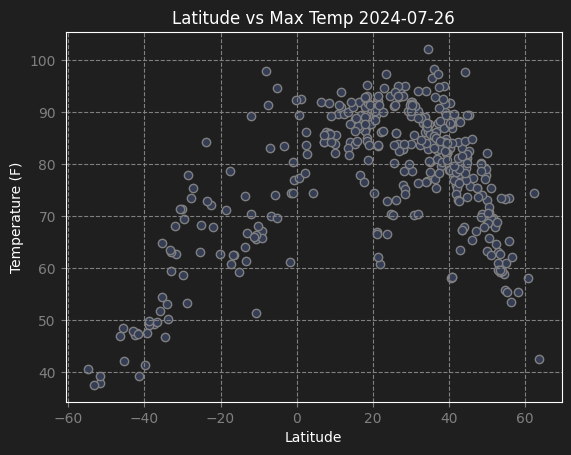

In [126]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.style.use('DarkTheme.mplstyle')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='gray', facecolors='#343d54')

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp ' + date_string)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True, axis='both', linestyle='--')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

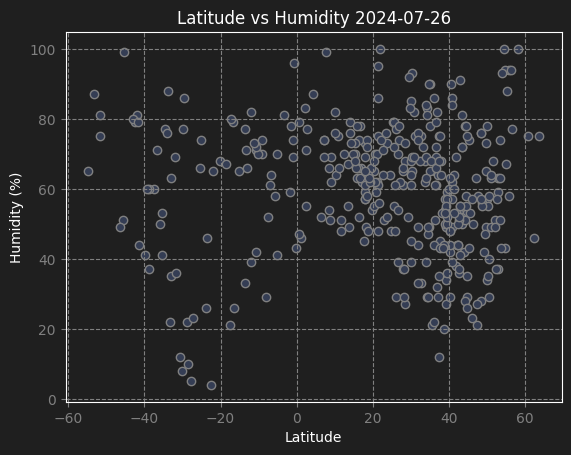

In [127]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='gray', facecolors='#343d54')
# Incorporate the other graph properties
plt.title ('Latitude vs Humidity ' + date_string)
plt.xlabel ('Latitude')
plt.ylabel ('Humidity (%)')
plt.grid (True, axis='both', linestyle='--')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

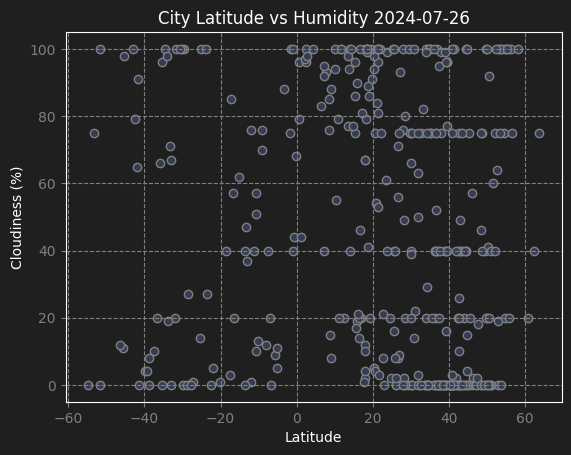

In [281]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='gray', facecolors='#343d54')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity ' + date_string)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, axis='both', linestyle='--')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

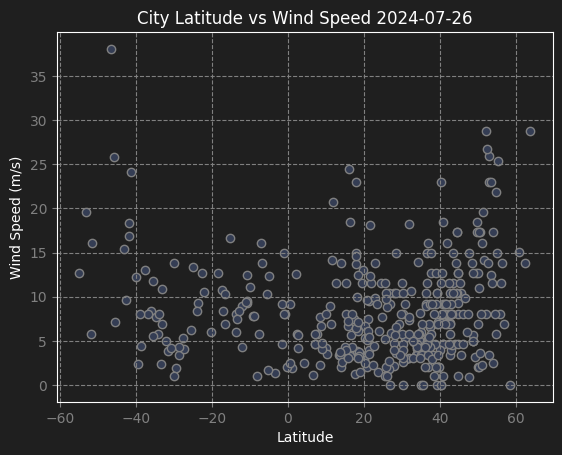

In [129]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='gray', facecolors='#343d54')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed ' + date_string)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='both', linestyle='--')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [257]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Compute linear regression (slope, intercept, rvalue, pvalue) = linregress(x_values, y_values)
    reg = linregress(x_values, y_values)
    slope, intercept = reg[0], reg[1]
    rvalue = reg[2]

    regressivevalues = x_values * slope + intercept

    plt.scatter(x_values, y_values, edgecolors='gray', facecolors='#343d54')
    plt.grid(True, axis='both', linestyle='--')
    plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize='15', color='white')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [237]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernHemisphere = city_data_df.loc[(city_data_df['Lat'] >= 0 )]

# Display sample data
northernHemisphere.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,las tablas,7.7667,-80.2833,86.18,99,93,5.73,PA,1722014514
1,doctor arroyo,23.6667,-100.1833,66.56,73,99,1.41,MX,1722014515
2,yellowknife,62.4560,-114.3525,74.41,46,40,13.80,CA,1722014483
6,thompson,55.7435,-97.8558,73.56,94,100,8.05,CA,1722014398
8,riohacha,11.5444,-72.9072,93.87,48,100,14.16,CO,1722014517
...,...,...,...,...,...,...,...,...,...
128,morant bay,17.8815,-76.4093,92.82,73,2,13.67,JM,1722014556
129,villanueva,15.3167,-88.0000,88.79,70,75,8.05,HN,1722014557
130,gulf breeze,30.3571,-87.1639,91.99,65,0,4.61,US,1722014557


In [238]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernHemisphere = city_data_df.loc[(city_data_df['Lat'] <= 0 )]

# Display sample data
southernHemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,coquimbo,-29.9533,-71.3436,58.73,77,0,13.80,CL,1722014515
4,puerto ayora,-0.7393,-90.3518,76.96,96,44,8.01,EC,1722014516
5,puerto natales,-51.7236,-72.4875,37.85,81,100,5.75,CL,1722014516
7,adamstown,-25.0660,-130.1015,68.22,74,100,13.38,PN,1722014517
9,punta arenas,-53.1500,-70.9167,37.51,87,75,19.57,CL,1722014343


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.2998058996081929


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


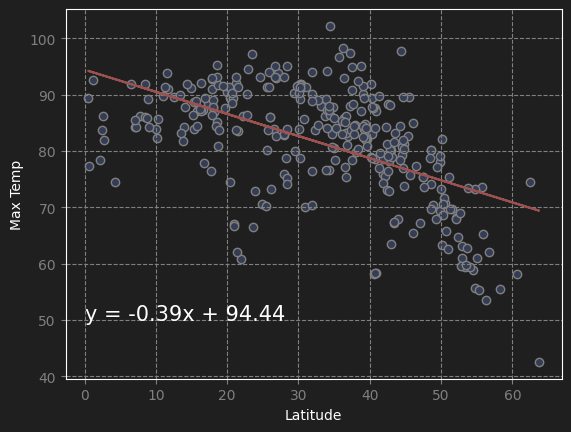

In [260]:
# Linear regression on Northern Hemisphere
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Max Temp"]

plot_linear_regression(xValues, yValues, "Max Temp", (0, 50))

The r-value is: 0.6064642896866596


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


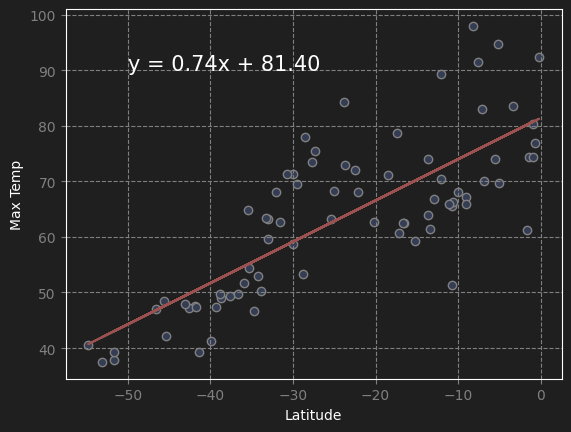

In [262]:
# Linear regression on Southern Hemisphere
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Max Temp"]

plot_linear_regression(xValues, yValues, "Max Temp", (-50, 90))

**Discussion about the linear relationship:** 
The southern hemisphere has an extremly strong linear correlation, with it's R-value being .6; and while the northern hemisphere still has a decent correlation, it's correlation being .29, it is effected by the sun having more direct coverage, since it is summer there. This causes a curve in the temperature readings. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03589520740247386


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


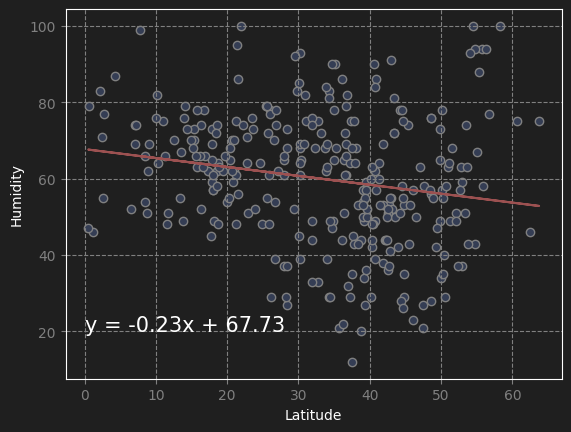

In [267]:
# Northern Hemisphere
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Humidity"]

plot_linear_regression(xValues, yValues, "Humidity", (0, 20))

The r-value is: 4.820153070389276e-05


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


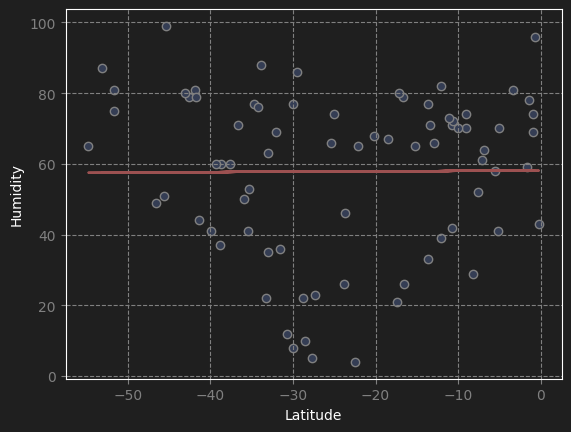

In [280]:
# Southern Hemisphere
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Humidity"]

plot_linear_regression(xValues, yValues, "Humidity", (-60, 20))

**Discussion about the linear relationship:** 
Both the Southern and Northern hemispheres had bad overall correlation for humidity at different latitudes, however the Southern hemisphere is the worst. I suspect that winter causes huge instabilities of humanity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06435809478883275


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


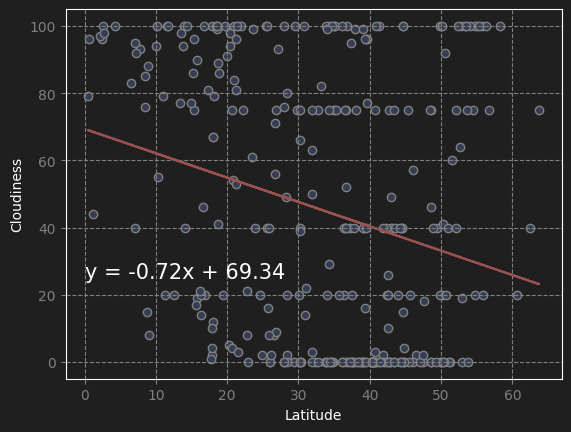

In [269]:
# Northern Hemisphere
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Cloudiness"]

plot_linear_regression(xValues, yValues, "Cloudiness", (0, 25))

The r-value is: 1.0727656774363211e-05


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


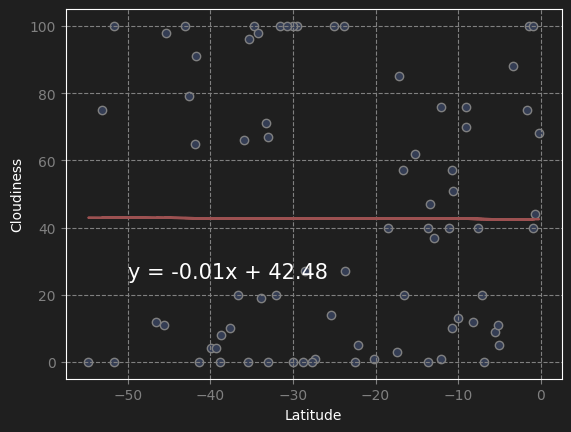

In [279]:
# Southern Hemisphere
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Cloudiness"]

plot_linear_regression(xValues, yValues, "Cloudiness", (-50, 25))

**Discussion about the linear relationship:** 
While both have bad correlation, again the Southern hemisphere is terrible, I believe again that winter causes instability, and more variable weather along the lats.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07611719605063738


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


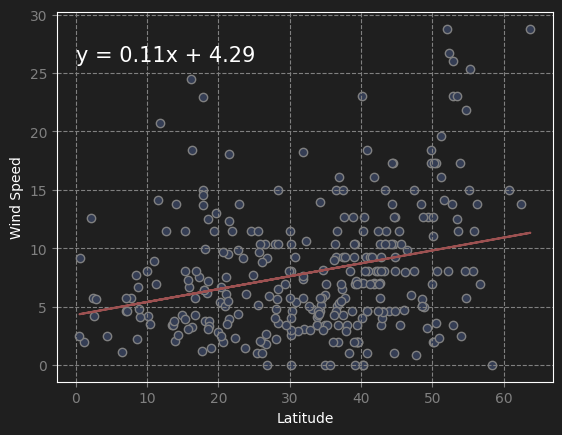

In [272]:
# Northern Hemisphere
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Wind Speed"]

plot_linear_regression(xValues, yValues, "Wind Speed", (0, 26))

The r-value is: 0.09033856877164721


C:\Users\nolan\AppData\Local\Temp\ipykernel_38848\2531235505.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regressivevalues, "r-", color = '#9c5151')


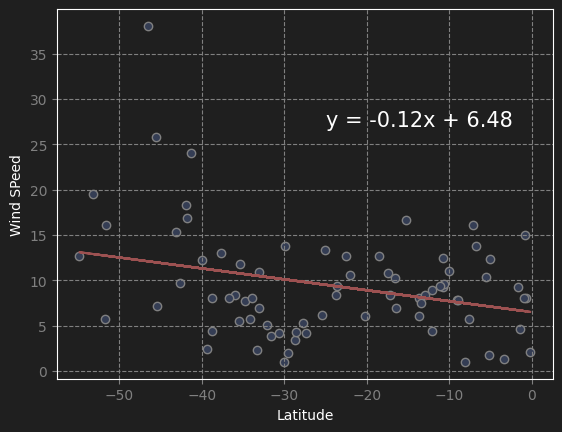

In [278]:
# Southern Hemisphere
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Wind Speed"]

plot_linear_regression(xValues, yValues, "Wind SPeed", (-25, 27))

**Discussion about the linear relationship:** These both had low correlation, however there was some. These scatter plots would suggest that winds are stronger the further they are from the equator.